## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn import metrics

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

## Load the Data

In [2]:
df=pd.read_csv(r'C:\Users\jawad\Downloads\archive (1)\Cardiovascular_Disease_Dataset\Cardiovascular_Disease_Dataset.csv')

In [3]:
df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [4]:
df['patientid'].count()

1000

## Data Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


## Data Processing

### Handling missing values

In [6]:
df.isnull().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [7]:
df.columns

Index(['patientid', 'age', 'gender', 'chestpain', 'restingBP',
       'serumcholestrol', 'fastingbloodsugar', 'restingrelectro',
       'maxheartrate', 'exerciseangia', 'oldpeak', 'slope', 'noofmajorvessels',
       'target'],
      dtype='object')

In [8]:
df = df[df['serumcholestrol'] >= 126]

## Exploratory Data Analysis (EDA)

### What is count of patient !?

In [9]:
df['patientid'].count()

940

### What is the age range of patients in the dataset?
### Answer: Age Range: 20 - 80
### Explanation: The age range is determined by finding the minimum and maximum age values in the dataset. In this case, patients' ages range from 20 to 80 years.

In [10]:
age_range = f"Age Range: {df['age'].min()} - {df['age'].max()}"
print(age_range)

Age Range: 20 - 80


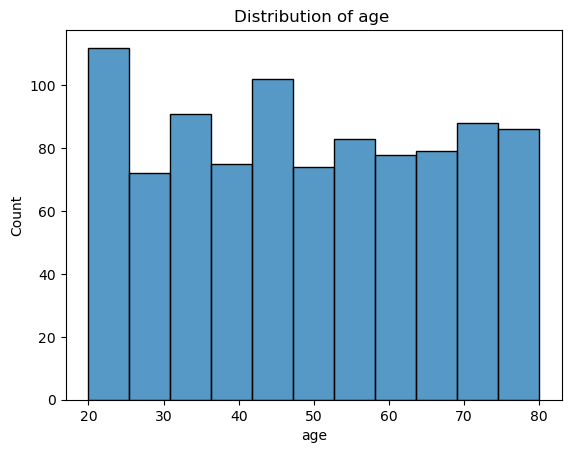

In [11]:
sns.histplot(df['age'])
plt.title('Distribution of age ')
plt.show()

### How many males and females are represented in the dataset?
### Answer: Female: 1, Male: 0
### Explanation: The dataset contains only female patients, as indicated by the 'gender' column where 1 represents female and 0 represents male.

In [12]:
gender_count = df['gender'].value_counts()
print(gender_count)

1    718
0    222
Name: gender, dtype: int64


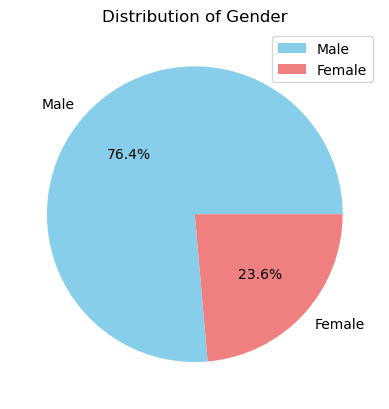

In [13]:
g = df['gender'].value_counts()
gender_labels = {1: 'Male', 0: 'Female'}
g.index = g.index.map(gender_labels)

colors = ['skyblue', 'lightcoral']  
plt.pie(g, labels=g.index, autopct='%1.1f%%', colors=colors)
plt.legend()
plt.title('Distribution of Gender')
plt.show()

### What is the most common type of chest pain observed in the patients?
### chestpain --> 0 (typical angina), 1 (atypical angina), 2 (non-anginal pain), 3 (asymptomatic)
#### Answer: Chest Pain Type 0Explanation: Chest pain type 0 is the most common among the patients, as determined by counting the occurrences in the 'chestpain' column.

In [14]:
chest_pain_counts = df['chestpain'].value_counts()
print(chest_pain_counts)

0    402
2    290
1    205
3     43
Name: chestpain, dtype: int64


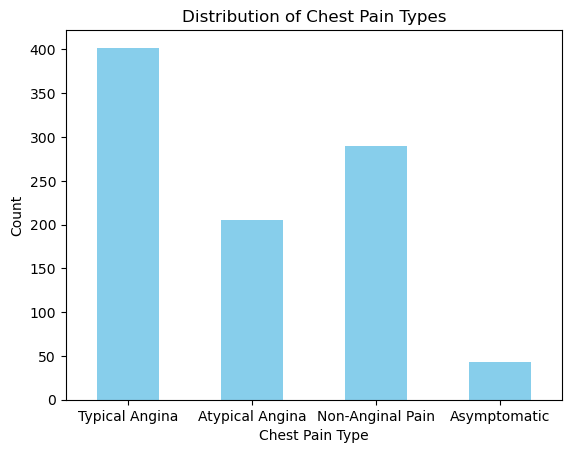

In [15]:
chestpain_labels = {0: 'Typical Angina', 1: 'Atypical Angina', 2: 'Non-Anginal Pain', 3: 'Asymptomatic'}
bf = df['chestpain'].value_counts().sort_index().plot(kind='bar', color='skyblue')
bf.set_xticklabels([chestpain_labels[i] for i in bf.get_xticks()], rotation=0)
plt.title('Distribution of Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

### What is the average resting blood pressure among the patients?
### restingBP --> 94-200 (in mm HG)
#### Answer: Average Resting Blood Pressure: 151.75 mm HgExplanation: The average resting blood pressure is calculated by taking the mean of the values in the 'restingBP' column.

In [16]:
average_resting_bp = df['restingBP'].mean()
print(f"Average Resting Blood Pressure: {average_resting_bp:.2f} mm Hg")

Average Resting Blood Pressure: 151.07 mm Hg


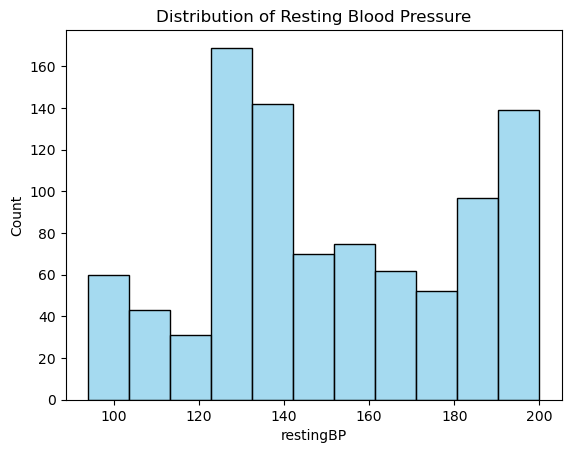

In [17]:
sns.histplot(df['restingBP'], color='skyblue') 
plt.title('Distribution of Resting Blood Pressure')
plt.show()

### How does serum cholesterol vary across different patients?
### serumcholestrol --> 126-564 (in mg/dl)
### Explanation: Serum cholesterol distribution is visualized using a boxplot, providing insights into the spread and central tendency of cholesterol levels among patients.

In [18]:
df['serumcholestrol'].min(),df['serumcholestrol'].mean(),

(132, 330.68510638297874)

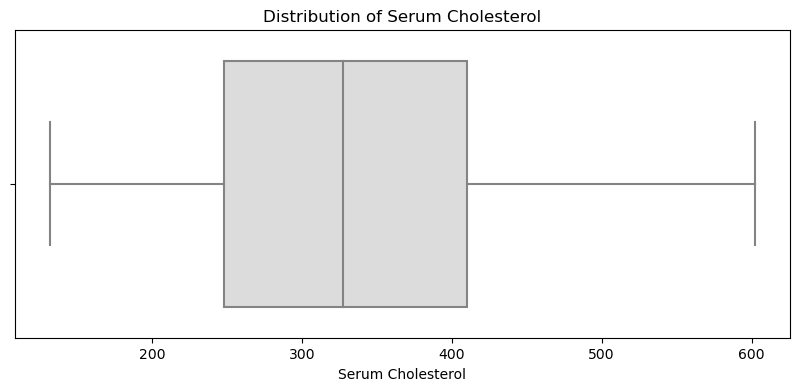

In [19]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='serumcholestrol', data=df, palette='coolwarm')
plt.title('Distribution of Serum Cholesterol')
plt.xlabel('Serum Cholesterol')
plt.show()

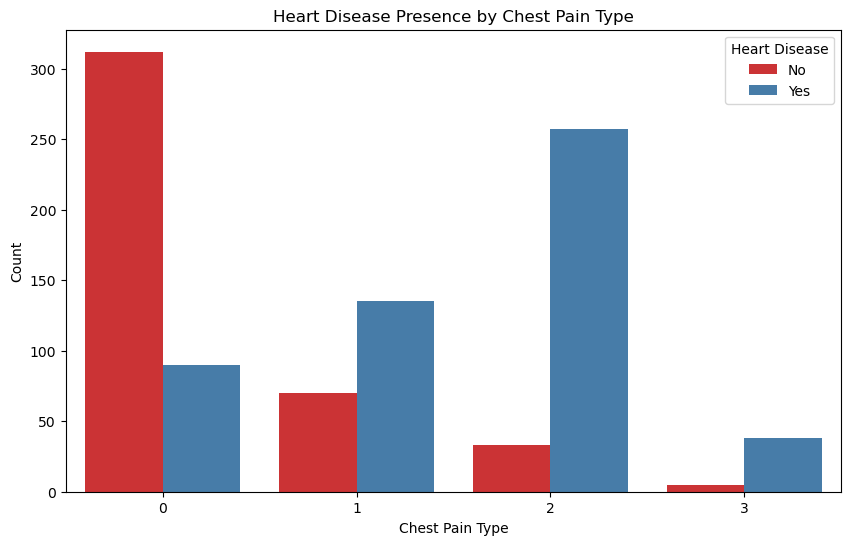

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='chestpain', hue='target', data=df, palette='Set1')
plt.title('Heart Disease Presence by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

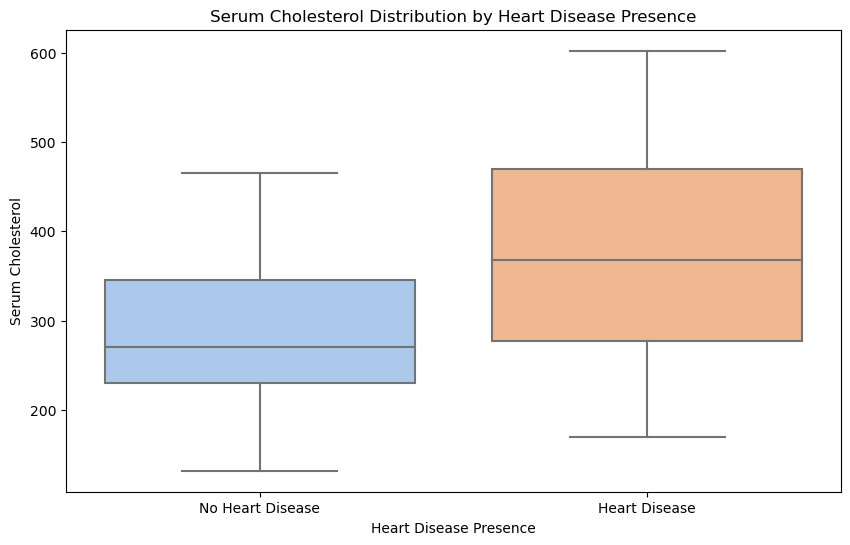

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='serumcholestrol', data=df, palette='pastel')
plt.title('Serum Cholesterol Distribution by Heart Disease Presence')
plt.xlabel('Heart Disease Presence')
plt.ylabel('Serum Cholesterol')
plt.xticks(ticks=[0, 1], labels=['No Heart Disease', 'Heart Disease'])
plt.show()

### What percentage of patients have fasting blood sugar greater than 120 mg/dl?
#### Answer: Percentage of patients with fasting blood sugar > 120 mg/dl: 31.49%
#### Explanation: The percentage is calculated by dividing the number of patients with fasting blood sugar greater than 120 mg/dl by the total number of patients.

In [22]:
percentage_high_fasting_sugar = (df['fastingbloodsugar'].sum() / len(df)) * 100
print(f"Percentage of patients with fasting blood sugar > 120 mg/dl: {percentage_high_fasting_sugar:.2f}%")

Percentage of patients with fasting blood sugar > 120 mg/dl: 31.49%


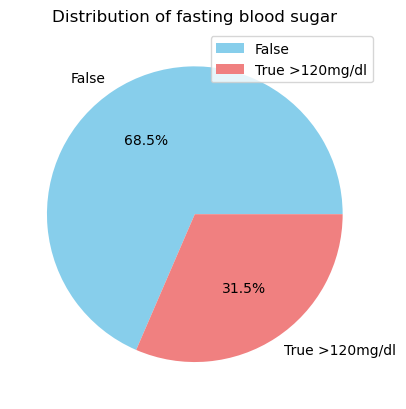

In [23]:
g = df['fastingbloodsugar'].value_counts()
gender_labels = {1: 'True >120mg/dl', 0: 'False'}
g.index = g.index.map(gender_labels)

colors = ['skyblue', 'lightcoral']  
plt.pie(g, labels=g.index, autopct='%1.1f%%', colors=colors)
plt.legend()
plt.title('Distribution of fasting blood sugar')
plt.show()

### What are the predominant resting electrocardiogram results in the dataset?
### restingrelectro--> 0 (normal), 1 (ST-T wave abnormality), 2 (probable or definite left ventricular hypertrophy)
### Answer: The counts of normal and abnormal resting electrocardiogram results are determined from the 'restingrelectro' column.

In [24]:
resting_electro_counts = df['restingrelectro'].value_counts()
print(resting_electro_counts)

0    437
1    323
2    180
Name: restingrelectro, dtype: int64


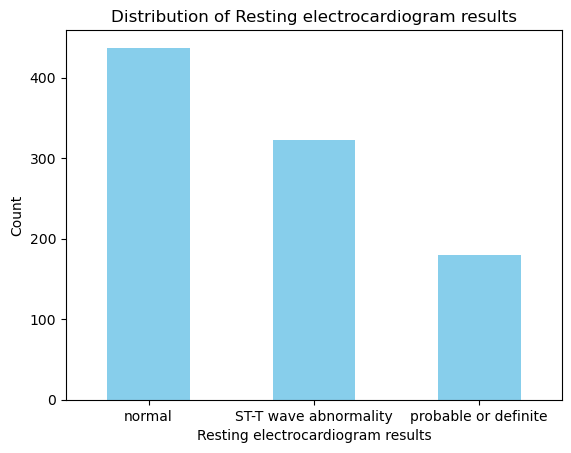

In [25]:
chestpain_labels = {0: 'normal', 1: 'ST-T wave abnormality', 2: 'probable or definite'}
re= df['restingrelectro'].value_counts().sort_index().plot(kind='bar', color='skyblue')
re.set_xticklabels([chestpain_labels[i] for i in re.get_xticks()], rotation=0)
plt.title('Distribution of Resting electrocardiogram results')
plt.xlabel('Resting electrocardiogram results')
plt.ylabel('Count')
plt.show()

### What is the average maximum heart rate achieved by the patients on average?
#### Answer: Average Maximum Heart Rate: 145.48Explanation: The average maximum heart rate is calculated by taking the mean of values in the 'maxheartrate' column.

In [26]:
average_max_heart_rate = df['maxheartrate'].mean()
print(f"Average Maximum Heart Rate: {average_max_heart_rate:.2f}")

Average Maximum Heart Rate: 144.93


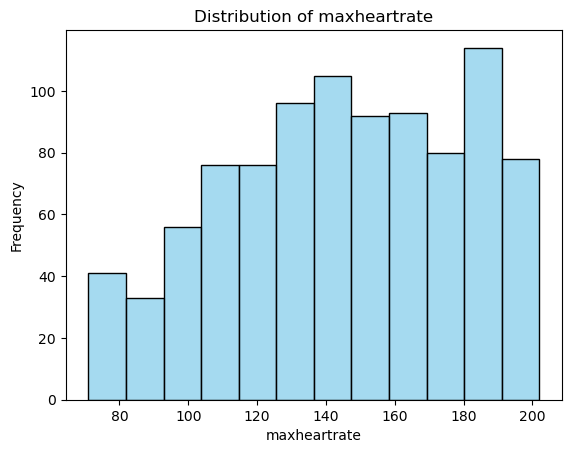

In [27]:
sns.histplot(df['maxheartrate'], color='skyblue') 
plt.title('Distribution of maxheartrate')
plt.xlabel('maxheartrate')
plt.ylabel('Frequency')
plt.show()

### How many patients experienced exercise-induced angina?
### (exerciseangia --> Exercise induced angina)

In [28]:
exercise_angina_count = df['exerciseangia'].sum()
print(f"Number of Patients with Exercise-Induced Angina: {exercise_angina_count}")

Number of Patients with Exercise-Induced Angina: 474


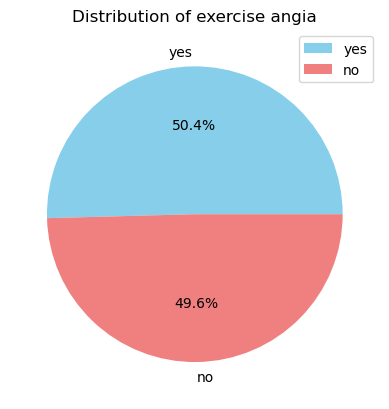

In [29]:
e = df['exerciseangia'].value_counts()
gender_labels = {1: 'yes', 0: 'no'}
e.index = e.index.map(gender_labels)

colors = ['skyblue', 'lightcoral']  
plt.pie(e, labels=e.index, autopct='%1.1f%%', colors=colors)
plt.legend()
plt.title('Distribution of exercise angia')
plt.show()

### What is the average oldpeak (ST depression induced by exercise relative to rest) among the patients?

In [30]:
average_oldpeak = df['oldpeak'].mean()
print(f"Average Oldpeak: {average_oldpeak:.2f}")

Average Oldpeak: 2.70


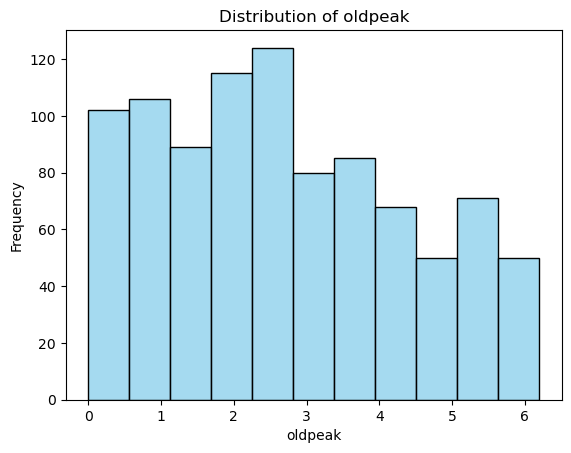

In [31]:
sns.histplot(df['oldpeak'], color='skyblue') 
plt.title('Distribution of oldpeak')
plt.xlabel('oldpeak')
plt.ylabel('Frequency')
plt.show()

### How is the slope of the peak exercise ST segment distributed in the dataset?

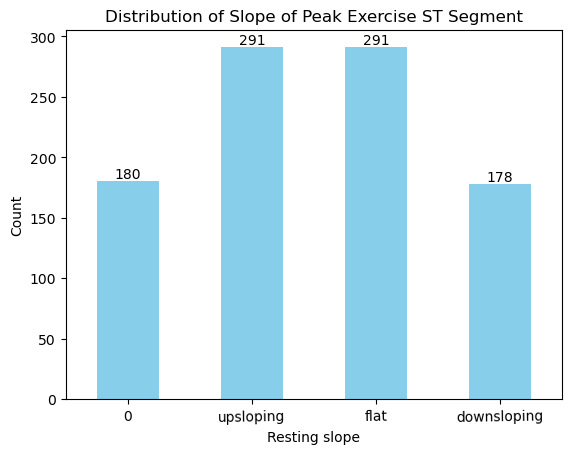

In [32]:
chestpain_labels = {0:'0',1: 'upsloping', 2: 'flat',3:'downsloping'}
re= df['slope'].value_counts().sort_index().plot(kind='bar', color='skyblue')

for p in re.patches:
    re.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', color='black')

re.set_xticklabels([chestpain_labels[i] for i in re.get_xticks()], rotation=1)

plt.title('Distribution of Slope of Peak Exercise ST Segment')
plt.xlabel('Resting slope')
plt.ylabel('Count')
plt.show()

### What is the range of the number of major vessels in the patients?

In [33]:
vessels_range = f"Number of Major Vessels Range: {df['noofmajorvessels'].min()} - {df['noofmajorvessels'].max()}"
print(vessels_range)

Number of Major Vessels Range: 0 - 3


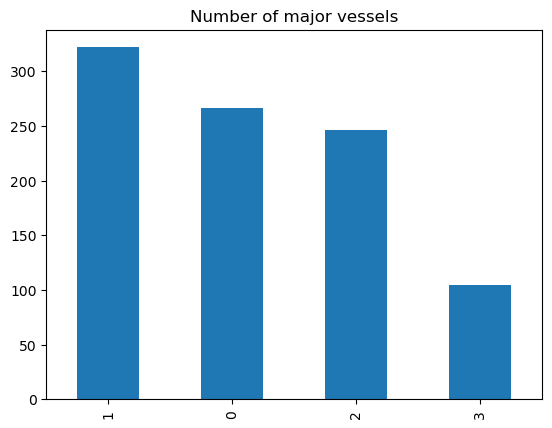

In [34]:
df['noofmajorvessels'].value_counts().plot(kind='bar')
plt.title('Number of major vessels')
plt.show()

### What percentage of patients in the dataset have heart disease (target = 1)?

In [35]:
percentage_heart_disease = (df['target'].sum() / len(df)) * 100
print(f"Percentage of Patients with Heart Disease: {percentage_heart_disease:.2f}%")

Percentage of Patients with Heart Disease: 55.32%


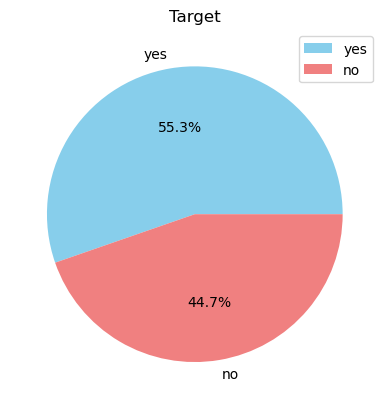

In [36]:
t = df['target'].value_counts()
gender_labels = {1: 'Presence', 0: 'Absence'}
t.index = t.index.map(gender_labels)

colors = ['skyblue', 'lightcoral']  
plt.pie(t, labels=e.index, autopct='%1.1f%%', colors=colors)
plt.legend()
plt.title('Target')
plt.show()

### Can you identify the patient with the highest age in the dataset?

In [37]:
oldest_patient = df.loc[df['age'].idxmax()]
print(f"Details of the Oldest Patient:\n{oldest_patient}")

Details of the Oldest Patient:
patientid            1160678.0
age                       80.0
gender                     1.0
chestpain                  1.0
restingBP                130.0
serumcholestrol          342.0
fastingbloodsugar          0.0
restingrelectro            0.0
maxheartrate             176.0
exerciseangia              1.0
oldpeak                    2.5
slope                      0.0
noofmajorvessels           0.0
target                     0.0
Name: 102, dtype: float64


### How many patients have all three major vessels showing defects?

In [38]:
defects_count = len(df[df['noofmajorvessels'] == 3])
print(f"Number of Patients with Defects in All Three Major Vessels: {defects_count}")

Number of Patients with Defects in All Three Major Vessels: 105


In [39]:
df.head(3)

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1


In [40]:
df.drop(columns='patientid',inplace=True)

### Data included patient have a heart disease and male gender

In [41]:
patient_Presence=df[df['target']==1]

In [42]:
patient_Presence_male=patient_Presence[patient_Presence['gender']==1]

In [43]:
patient_Presence_male.describe()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,400.000000,400.0,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000,400.000000,400.000000,400.000000,400.0
mean,49.495000,1.0,1.512500,163.902500,366.012500,0.472500,1.017500,154.81250,0.475,3.098500,2.215000,1.730000,1.0
std,17.206106,0.0,0.810238,24.030223,113.727976,0.499868,0.792947,25.84419,0.500,1.783943,0.659441,0.786541,0.0
min,20.000000,1.0,0.000000,94.000000,170.000000,0.000000,0.000000,105.00000,0.000,0.000000,1.000000,0.000000,1.0
25%,35.000000,1.0,1.000000,147.000000,271.750000,0.000000,0.000000,137.00000,0.000,1.575000,2.000000,1.000000,1.0
50%,49.000000,1.0,2.000000,166.000000,367.000000,0.000000,1.000000,154.50000,0.000,3.100000,2.000000,2.000000,1.0
75%,63.250000,1.0,2.000000,184.000000,464.000000,1.000000,2.000000,176.00000,1.000,4.600000,3.000000,2.000000,1.0
max,80.000000,1.0,3.000000,200.000000,602.000000,1.000000,2.000000,202.00000,1.000,6.200000,3.000000,3.000000,1.0


### Data included patient have a heart disease and female gender

In [44]:
patient_Presence_female =patient_Presence[patient_Presence['gender']==0]
patient_Presence_female.describe()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,120.000000,120.0,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.0
mean,49.750000,0.0,1.316667,165.366667,386.616667,0.425000,1.033333,142.175000,0.541667,2.032500,2.241667,1.333333,1.0
std,17.467016,0.0,1.004053,32.480099,108.372311,0.496416,0.829431,34.028081,0.500350,0.884808,0.594030,1.023533,0.0
min,20.000000,0.0,0.000000,94.000000,177.000000,0.000000,0.000000,96.000000,0.000000,0.000000,1.000000,0.000000,1.0
25%,36.750000,0.0,0.000000,133.000000,297.750000,0.000000,0.000000,109.500000,0.000000,1.400000,2.000000,0.000000,1.0
50%,49.000000,0.0,1.000000,184.000000,385.500000,0.000000,1.000000,140.500000,1.000000,1.900000,2.000000,1.000000,1.0
75%,64.250000,0.0,2.000000,191.000000,488.250000,1.000000,2.000000,175.000000,1.000000,2.750000,3.000000,2.000000,1.0
max,80.000000,0.0,3.000000,200.000000,561.000000,1.000000,2.000000,198.000000,1.000000,3.200000,3.000000,3.000000,1.0


### Data included patient not have a heart disease and male gender

In [45]:
patient_Absence=df[df['target']==0]

In [46]:
patient_Absence_male=patient_Absence[patient_Absence['gender']==1]

In [47]:
patient_Absence_male.describe()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,318.000000,318.0,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.0
mean,48.776730,1.0,0.342767,131.842767,265.905660,0.132075,0.314465,135.584906,0.522013,2.909119,0.528302,0.569182,0.0
std,18.822862,0.0,0.663701,26.501481,73.779345,0.339106,0.484958,39.975750,0.500302,1.737927,0.548141,0.782252,0.0
min,20.000000,1.0,0.000000,94.000000,132.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,32.000000,1.0,0.000000,113.250000,231.250000,0.000000,0.000000,101.000000,0.000000,1.325000,0.000000,0.000000,0.0
50%,48.500000,1.0,0.000000,127.000000,268.000000,0.000000,0.000000,132.000000,1.000000,2.900000,1.000000,0.000000,0.0
75%,66.000000,1.0,0.000000,140.000000,336.000000,0.000000,1.000000,172.000000,1.000000,4.300000,1.000000,1.000000,0.0
max,80.000000,1.0,3.000000,200.000000,357.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,0.0


### Data included patient not have a heart disease and female gender

In [48]:
patient_Absence_female =patient_Absence[patient_Absence['gender']==0]
patient_Absence_female.describe()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,102.000000,102.0,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.0
mean,49.970588,0.0,0.411765,143.892157,328.303922,0.137255,0.509804,138.558824,0.519608,1.263725,0.823529,0.941176,0.0
std,18.393098,0.0,0.722385,24.724585,108.369718,0.345816,0.592780,37.034791,0.502083,0.833552,0.475369,0.899103,0.0
min,20.000000,0.0,0.000000,94.000000,164.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,33.500000,0.0,0.000000,130.000000,221.250000,0.000000,0.000000,111.500000,0.000000,0.400000,1.000000,0.000000,0.0
50%,50.500000,0.0,0.000000,138.500000,361.000000,0.000000,0.000000,135.500000,1.000000,1.400000,1.000000,1.000000,0.0
75%,67.000000,0.0,1.000000,153.750000,431.000000,0.000000,1.000000,169.500000,1.000000,1.900000,1.000000,2.000000,0.0
max,80.000000,0.0,3.000000,200.000000,465.000000,1.000000,2.000000,202.000000,1.000000,2.600000,2.000000,3.000000,0.0


In [49]:
age_tregt=df.query('age >60 and target == 1')

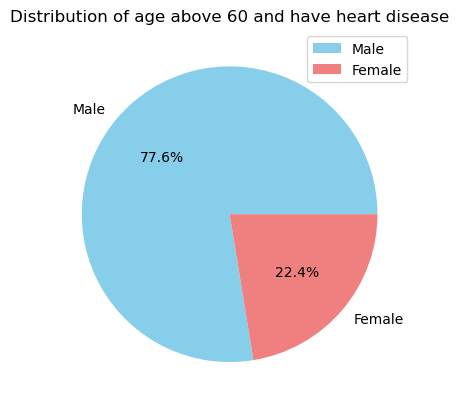

In [50]:
g = age_tregt['gender'].value_counts()
gender_labels = {1: 'Male', 0: 'Female'}
g.index = g.index.map(gender_labels)

colors = ['skyblue', 'lightcoral']  
plt.pie(g, labels=g.index, autopct='%1.1f%%', colors=colors)
plt.legend()
plt.title('Distribution of age above 60 and have heart disease')
plt.show()

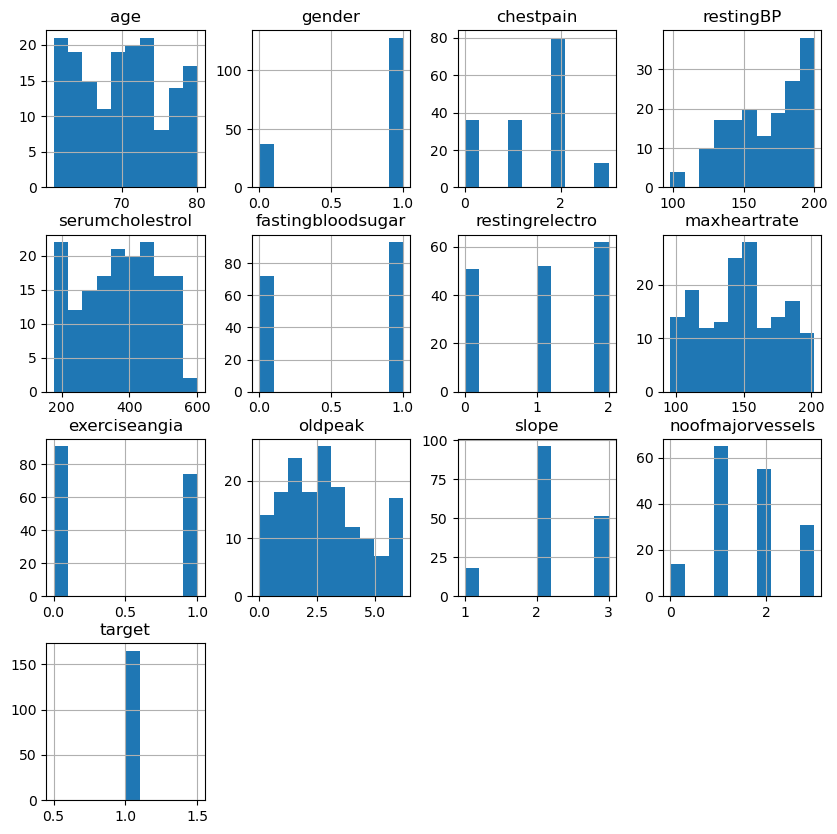

In [51]:
age_tregt.hist(figsize=(10,10))
plt.title('distribution of age above 60 and have heart disease')
plt.show()

In [52]:
df.corr()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
age,1.000000,-0.016006,0.026159,-0.012812,0.030561,0.048310,0.065891,-0.041836,-0.050568,-0.026387,-0.010105,0.037127,0.013533
gender,-0.016006,1.000000,0.041452,-0.081704,-0.145359,0.026458,-0.048265,0.071118,-0.030335,0.332686,-0.051569,0.027302,0.014149
chestpain,0.026159,0.041452,1.000000,0.236984,0.243054,0.246618,0.267668,0.123301,-0.021957,0.092843,0.482208,0.280123,0.574700
restingBP,-0.012812,-0.081704,0.236984,1.000000,0.225414,0.214770,0.224726,0.097276,-0.042387,-0.017991,0.384453,0.268510,0.486241
serumcholestrol,0.030561,-0.145359,0.243054,0.225414,1.000000,0.228596,0.208985,0.093932,0.002486,-0.019017,0.330124,0.229981,0.400109
fastingbloodsugar,0.048310,0.026458,0.246618,0.214770,0.228596,1.000000,0.170966,0.110579,0.003392,0.019508,0.282238,0.205352,0.351304
restingrelectro,0.065891,-0.048265,0.267668,0.224726,0.208985,0.170966,1.000000,0.097708,-0.020663,0.047383,0.350424,0.221114,0.429757
maxheartrate,-0.041836,0.071118,0.123301,0.097276,0.093932,0.110579,0.097708,1.000000,0.017852,0.042307,0.198203,0.128700,0.224399
exerciseangia,-0.050568,-0.030335,-0.021957,-0.042387,0.002486,0.003392,-0.020663,0.017852,1.000000,0.005433,-0.005262,-0.009386,-0.030869
oldpeak,-0.026387,0.332686,0.092843,-0.017991,-0.019017,0.019508,0.047383,0.042307,0.005433,1.000000,0.209356,0.063211,0.100021


In [53]:
df.head(1)

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
1,40,1,0,94,229,0,1,115,0,3.7,1,1,0


## Splitting the data in X and y

In [54]:
X=df.drop(columns='target')
y=df['target']

## Modelling

### Initialization

In [55]:
def clf_plot(y_pred) :
    '''
    1) Ploting Confusion Matrix
    2) Plotting Classification Report'''
    cm = metrics.confusion_matrix(y_test, y_pred)
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred, digits=3, output_dict=True)).T
    cr.drop(columns='support', inplace=True)

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))

    # Left: Confusion Matrix
    ax[0] = sns.heatmap(cm, annot=True, fmt='', cmap="plasma", ax=ax[0])
    ax[0].set_xlabel('Predicted labels', fontsize=18)
    ax[0].set_ylabel('True labels', fontsize=18)
    ax[0].set_title('Confusion Matrix', fontsize=25)
    ax[0].xaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])
    ax[0].yaxis.set_ticklabels(['Absence of Heart Disease','Presence of Heart Disease'])

    # Right: Classification Report
    ax[1] = sns.heatmap(cr, cmap='plasma', annot=True, linecolor='white', linewidths=0.5, ax=ax[1])
    ax[1].xaxis.tick_top()
    ax[1].set_title('Classification Report', fontsize=25)
    plt.show()

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### LogisticRegression

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
lg=LogisticRegression(solver='liblinear')

In [60]:
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)

In [61]:
accuracy1 = accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy1:.2f}')

Accuracy: 0.95


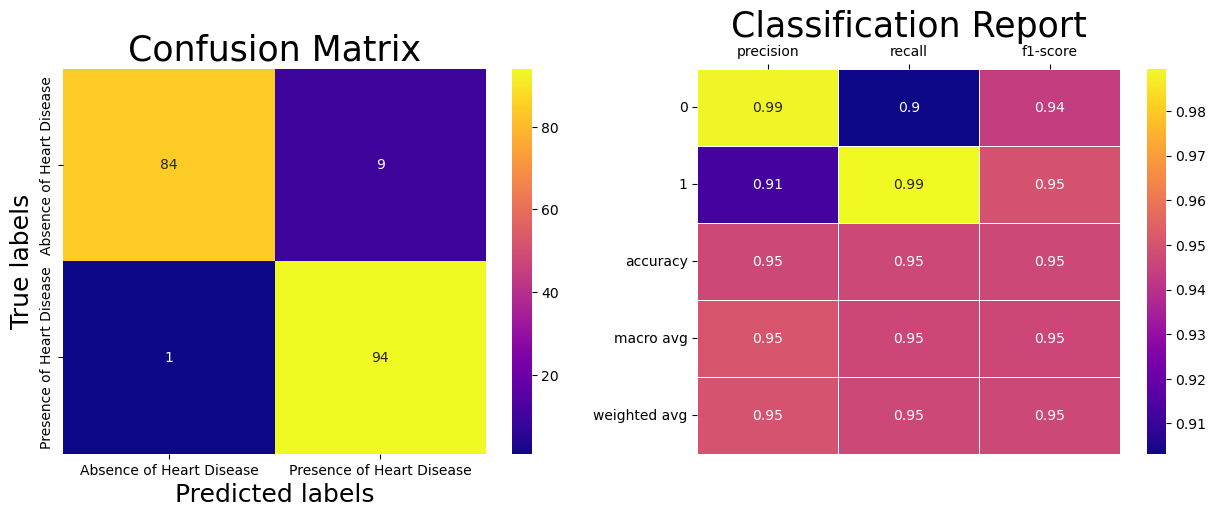

In [62]:
clf_plot(y_pred)

In [63]:
print("Testing Score:",lg.score(X_test,y_test)*100,'%')

Testing Score: 94.68085106382979 %


### SVC

In [64]:
from sklearn.svm import SVC

In [65]:
svm=SVC(kernel="rbf")

In [66]:
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

In [67]:
accuracy2 = accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy2:.2f}')

Accuracy: 0.80


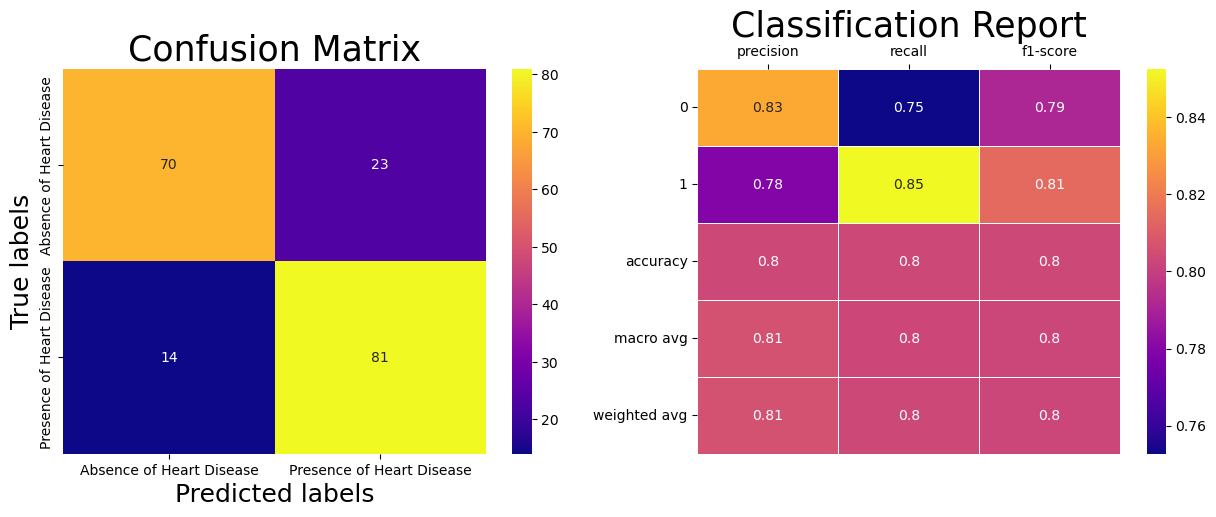

In [68]:
clf_plot(y_pred)

In [69]:
print("Testing Score:",svm.score(X_test,y_test)*100,'%')

Testing Score: 80.31914893617021 %


### HPT hyper tuning parameter 

In [70]:
svm=SVC(kernel="linear")

In [71]:
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

In [72]:
accuracy2 = accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy2:.3f}')

Accuracy: 0.968


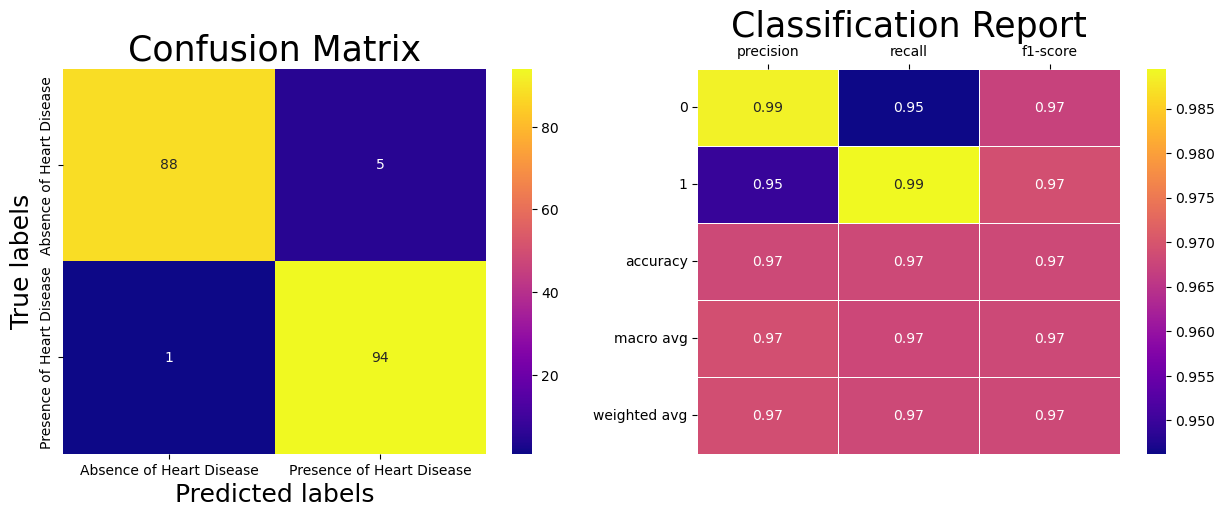

In [73]:
clf_plot(y_pred)

In [74]:

print("Testing Score:",svm.score(X_test,y_test)*100,'%')

Testing Score: 96.80851063829788 %


### DecisionTreeClassifier

In [75]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [76]:
dt2=DecisionTreeClassifier(max_depth=5)
dt2.fit(X_train,y_train)
ypred=dt2.predict(X_test)
ac3=accuracy_score(y_test,ypred)

In [77]:
print(f"{ac3:.3f}")

0.963


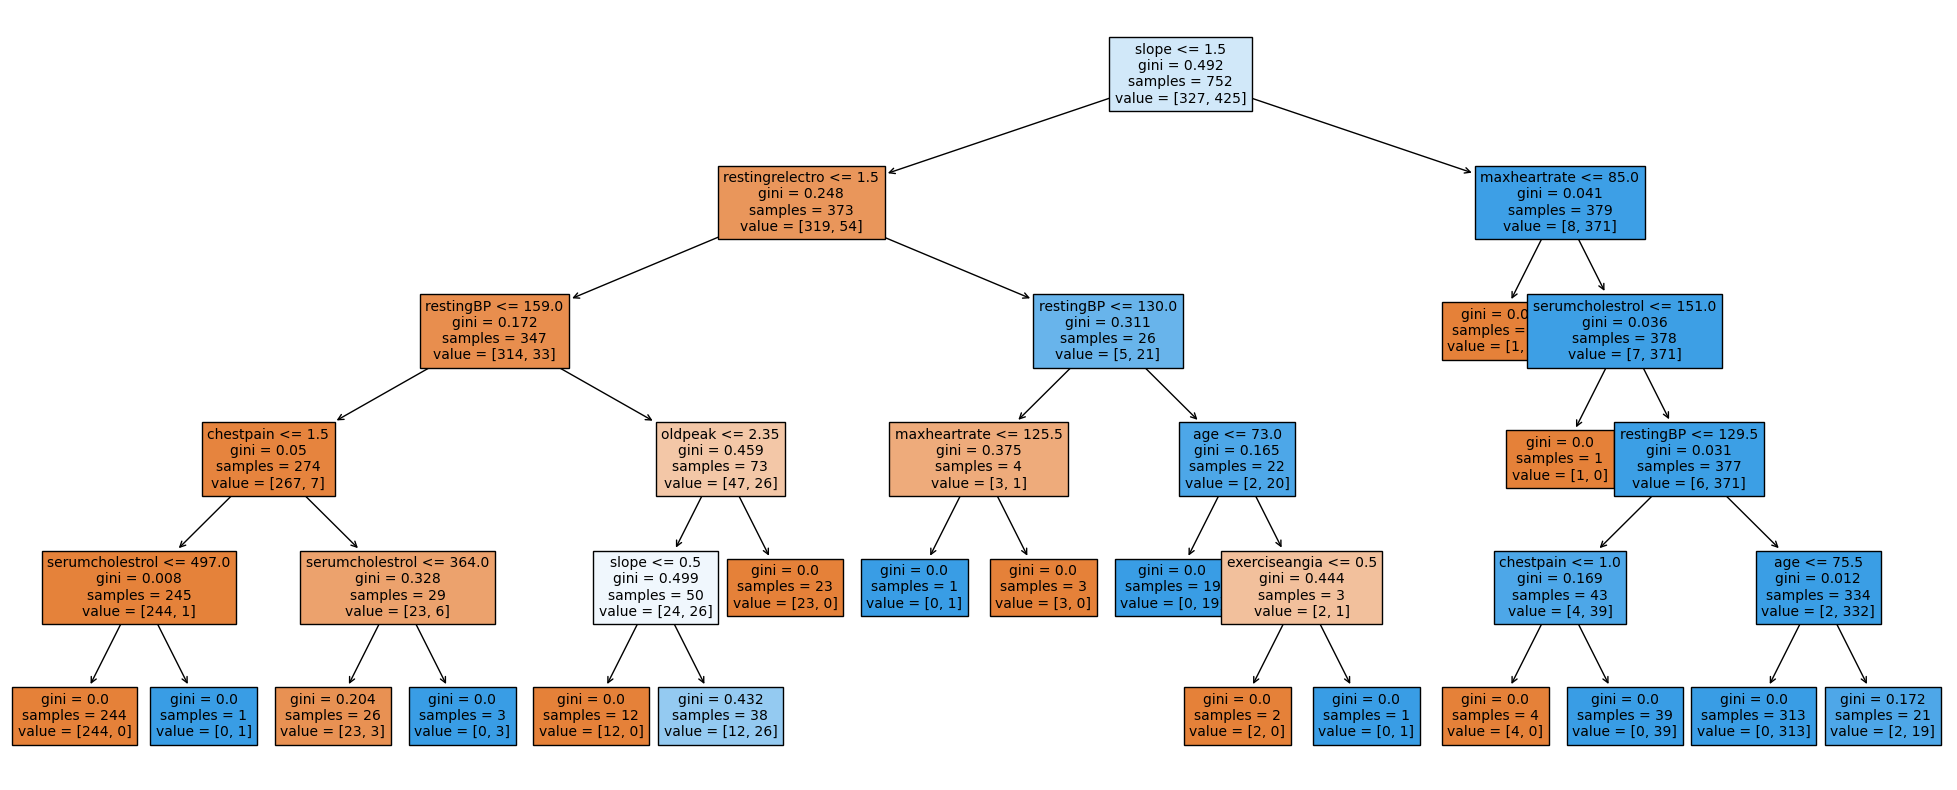

In [78]:
fig,ax=plt.subplots(figsize=(25,10))
chart=tree.plot_tree(dt2,max_depth=5,feature_names=X.columns.tolist(),filled=True,fontsize=10)
plt.savefig("def.jpg")

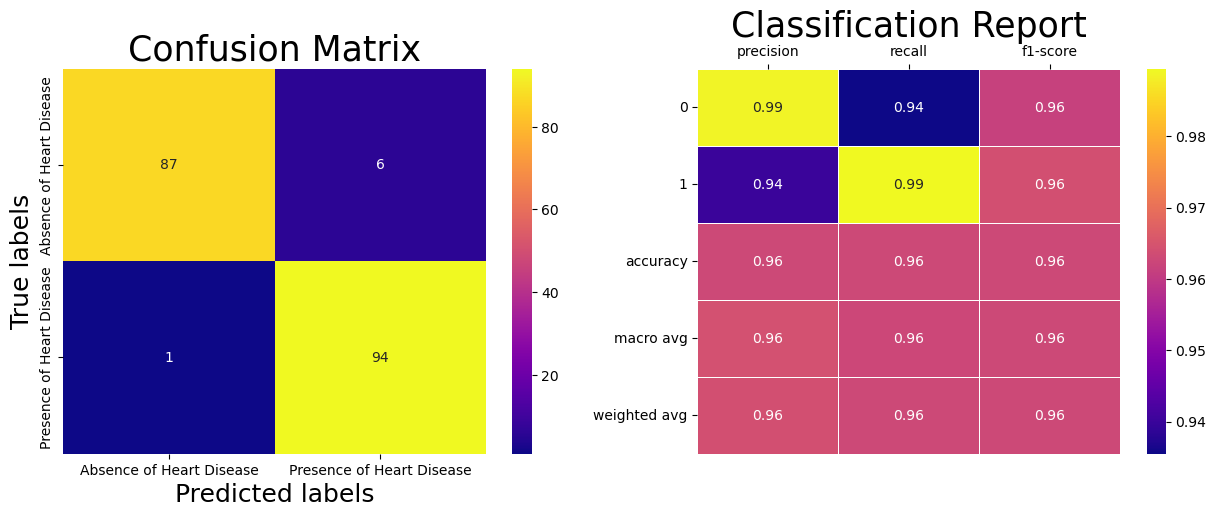

In [79]:
clf_plot(ypred)

In [80]:
print("Testing Score:",dt2.score(X_test,y_test)*100,'%')

Testing Score: 96.27659574468085 %


In [81]:
result = pd.DataFrame({
    'Algorithm' : ['LogisticRegression', 'SVC','DecisionTreeClassifier'],
    'Accuracy' : [accuracy1,accuracy2,ac3]
})

result.sort_values(by='Accuracy', inplace=True)

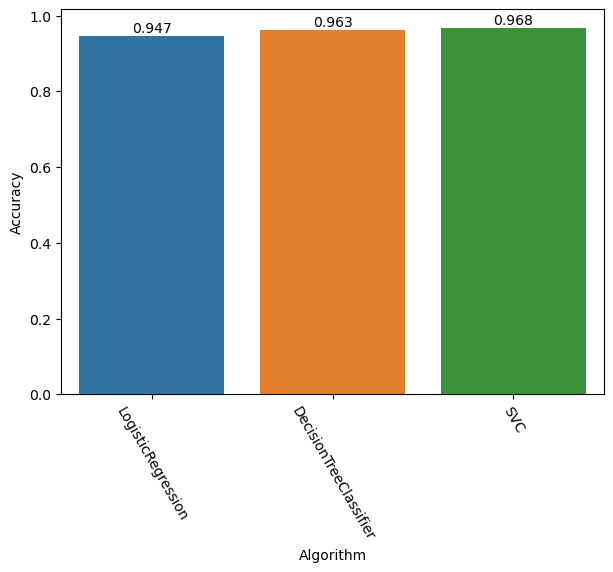

In [82]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))

sns.barplot(x='Algorithm', y='Accuracy', data=result)
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_xticklabels(labels=result.Algorithm, rotation=300)
plt.show()

## Conclusion
##### Our machine learning project aimed to predict cardiovascular disease using different algorithms.

##### Logistic regression achieved an accuracy of 94%, while the decision tree model attained 96.3% accuracy.

##### The support vector classifier (SVC) outperformed both with an accuracy of 96.8%.

##### Based on accuracy alone, SVC emerges as the most suitable model.

##### However, considerations such as interpretability and computational efficiency are important for model selection.

##### All models demonstrated robustness and generalization capabilities without significant overfitting.

##### Our findings underscore the potential of machine learning in cardiovascular disease prediction, paving the way for improved patient care and healthcare decision-making.
